In [78]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [79]:
#importation des données
fromage = pandas.read_table("fromage.txt",sep="\t",header=0,index_col=0)

#dimension des données
fromage.shape

#5 premières lignes des données
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [80]:
#statistiques descriptives
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


In [81]:
fromage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


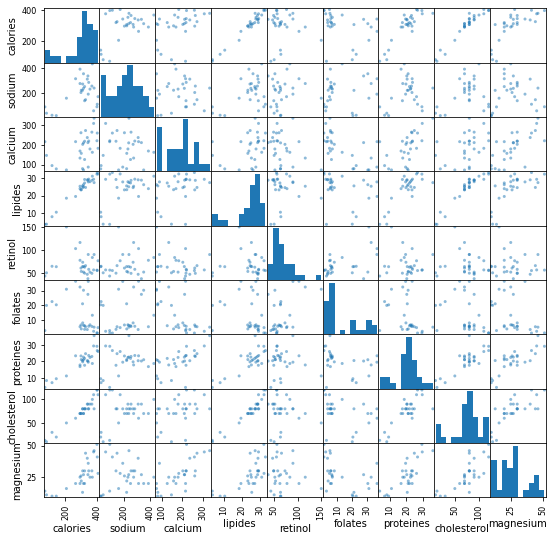

In [82]:
#graphique avec croisement deux à deux
pd.plotting.scatter_matrix(fromage,figsize=(9,9))
plt.show()

In [83]:
#centrage réduction des données
fromage_cr = preprocessing.scale(fromage)

In [84]:
#librairies pour la CAH : classification ascendante hiérarchique

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [85]:
#générer la matrice des liens
Z = linkage(fromage_cr,method='ward',metric='euclidean')

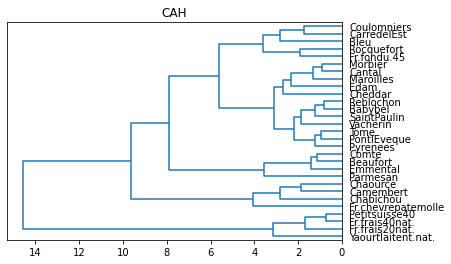

In [86]:
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=0)
plt.show()

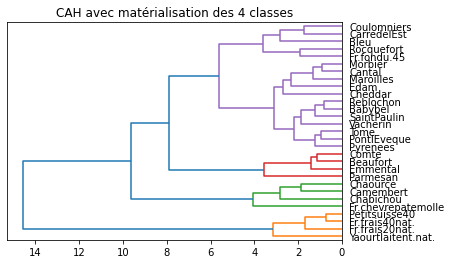

In [87]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=7)
plt.show()

In [88]:
#découpage à la hauteur t = 7 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [89]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

In [90]:
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


In [91]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage_cr)

print(kmeans.inertia_)

73.00278330776283


In [92]:
#index triés des groupes
idk = np.argsort(kmeans.labels_)

In [93]:
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idk],kmeans.labels_[idk]))

             Fromages
0         Fr.fondu.45
0             Babybel
0                Tome
0                Bleu
0         SaintPaulin
0              Cantal
0          Rocquefort
0           Reblochon
0             Cheddar
0            Pyrenees
0         PontlEveque
0             Morbier
0           Maroilles
0            Vacherin
1       Petitsuisse40
1      Fr.frais40nat.
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
2  Fr.chevrepatemolle
2         Coulomniers
2            Chaource
2           Chabichou
2           Camembert
2         CarredelEst
3            Emmental
3            Parmesan
3                Edam
3               Comte
3            Beaufort


In [94]:
#distances aux centres de classes des observations
print(kmeans.transform(fromage_cr))

[[2.91923811 5.52563871 2.22366092 5.21699713]
 [0.74374718 5.19015189 3.0178739  2.79338133]
 [2.85539991 7.50534896 5.16141204 1.14539172]
 [2.10536305 6.12458901 3.23696124 3.90039468]
 [3.54292429 5.40377152 1.93343014 5.1027633 ]
 [1.19391692 6.29601131 4.02486207 2.20069332]
 [3.38720801 5.92595629 1.77869718 4.53017038]
 [3.45802005 5.55487006 1.03237227 5.09064158]
 [1.95305264 6.82455372 3.74803439 2.29131322]
 [3.42031134 7.84252968 5.4424737  1.35227289]
 [2.48915384 4.84286038 1.95795563 4.74937695]
 [2.25403853 6.12567693 4.22922422 1.34428719]
 [3.39604145 7.47787998 5.52630163 0.90212763]
 [5.54292312 5.01044821 3.09730277 7.09387676]
 [1.88749301 5.28233144 2.837017   4.44924466]
 [6.00270259 0.682889   5.33113973 7.60942068]
 [5.60590975 1.00738319 4.5471731  7.3223388 ]
 [1.52552562 6.46351268 4.19758324 2.4532874 ]
 [0.6514557  6.06067377 3.47104401 2.50066762]
 [3.59516018 7.94344639 5.23422932 2.11236126]
 [5.39884861 1.21455139 4.37575251 7.13235133]
 [1.26131038 

In [95]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,4,0,0
2,0,0,4,0
3,0,0,0,4
4,14,0,2,1


In [96]:
#librairie pour évaluation des partitions
from sklearn import metrics

In [97]:
# utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
    
print(res)

[0.48626255 0.38724166 0.34540073 0.30390521 0.27280181 0.25259581
 0.27865064 0.23980216 0.29569363]


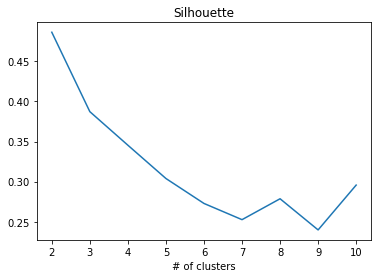

In [98]:
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [99]:
#moyenne par variable
m = fromage.mean()
print(m)

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64


In [100]:
#TSS
TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)

calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


In [101]:
#data.frame conditionnellement aux groupes
gb = fromage.groupby(kmeans.labels_)

In [102]:
#effectifs conditionnels
nk = gb.size()
print(nk)

0    14
1     4
2     6
3     5
dtype: int64


In [103]:
#moyennes conditionnelles
mk = gb.mean()
print(mk)

     calories      sodium  calcium    lipides    retinol    folates  \
0  334.285714  267.428571   199.70  27.500000  60.050000   7.728571   
1  101.750000   44.750000   133.75   6.275000  55.150000  16.475000   
2  288.000000  252.916667   110.10  23.866667  95.866667  31.266667   
3  377.200000  130.400000   278.98  29.460000  64.560000   3.120000   

   proteines  cholesterol  magnesium  
0  21.228571    83.571429  27.142857  
1   7.200000    18.250000  11.250000  
2  18.883333    68.333333  21.666667  
3  29.120000   102.000000  45.400000  


In [104]:
#pour chaque groupe ecart à la moyenne par variable
EMk = (mk-m)**2

In [105]:
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

In [106]:
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

calories       204332.558374
sodium         198134.447578
calcium         91337.127517
lipides          1576.637511
retinol          6258.237943
folates          2927.429492
proteines        1099.017164
cholesterol     17817.522578
magnesium        2855.967898
dtype: float64


In [107]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable
R2 = BSS/TSS
print(R2)

calories       0.863799
sodium         0.599117
calcium        0.620108
lipides        0.851983
retinol        0.382815
folates        0.760722
proteines      0.810316
cholesterol    0.797596
magnesium      0.796207
dtype: float64


In [108]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage_cr)

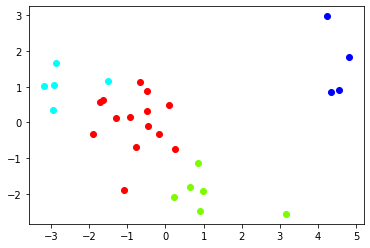

In [109]:
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show() 

In [110]:
print(fromage.shape)

(29, 9)


In [111]:
#retirer des observations le groupe n°0 des k-means
fromage_subset = fromage.iloc[kmeans.labels_!=0,:]
print(fromage_subset.shape)

(15, 9)


In [112]:
#centrer et réduire
fromage_subset_cr = preprocessing.scale(fromage_subset)

In [113]:
#générer la matrice des liens
Z_subset = linkage(fromage_subset_cr,method='ward',metric='euclidean')

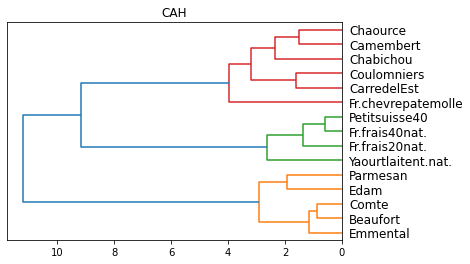

In [114]:
#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()

In [115]:
#groupes
groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)


[3 1 3 3 3 1 3 1 1 3 2 2 1 2 2]


In [116]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)

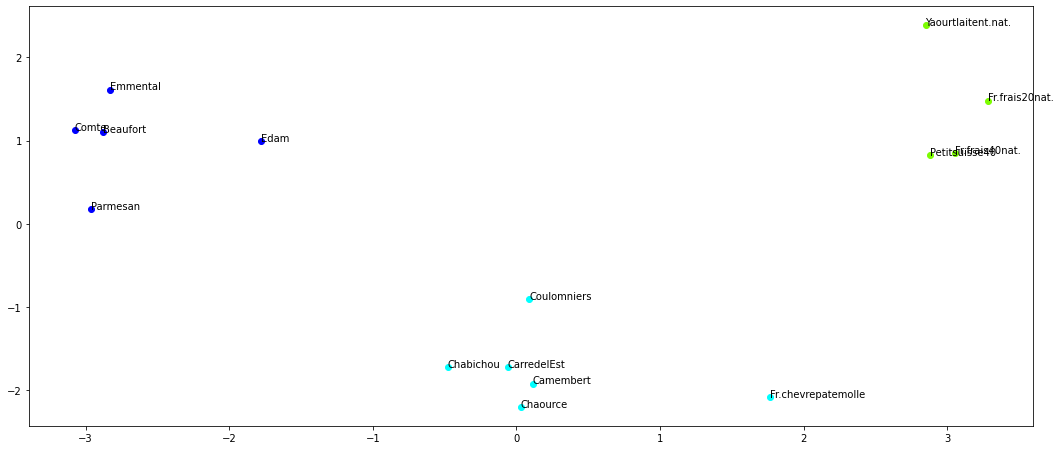

In [117]:
# projeter dans le plan factoriel avec un code couleur selon le groupe
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.show()